# HINDCAST DATA MSC50 Numerical Model
## EDA

### Description
Hindcast Data from the MSC50 Numerical model. Data is taken from 2 gridpoints: 
- GNO18918 : lat 48.7500 lon 233.7500 Depth 432.1110
- GN019006 : lat 49.0625, lon 233.7500, Depth   82.7388

Data is archived every 3 hour period from 1980-01 to 2015-12 https://meds-sdmm.dfo-mpo.gc.ca/isdm-gdsi/waves-vagues/MSC50-eng.html



### Methodology
EDA of hindcast data is split into three parts, general eda and exploration, linear regression and STL Decompostition. 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in data from ASCII format for Grid point GN018918 and

file_path1 = 'GN018918.opr_dump'
with open(file_path1, 'r') as file:
    data1 = file.read()
    
print(data1[:1500])

file_path2 = 'GN019006.opr_dump'
with open(file_path2, 'r') as file: 
    data2 = file.read()
    
print(data2[:1500])


 Gpt 018918, Lat 48.7500, Long 233.7500, Depth  432.1110
 OCEANWEATHER BIT-PACKED TIME SERIES - c:\temp\pacific\GN018918.opr
 Fields in this time series:
  CCYYMM      - Century, Year, Month
  DDHHmm      - Day, Hour, Minute (ut)
  WD          - Wind Direction (deg from which)
  WS          - Wind Speed (m/s)
  ETOT        - Total Variance of Total Spectrum (m^2)
  TP          - Peak Spectral Period of Total Spectrum (sec)
  VMD         - Vector Mean Direction of Total Spectrum (deg to which)
  ETTSea      - Total Variance of Primary Partition (m^2)
  TPSea       - Peak Spectral Period of Primary Partition (sec)
  VMDSea      - Vector Mean Direction of Primary Partition (deg to which)
  ETTSw       - Total Variance of Secondary Partition (m^2)
  TPSw        - Peak Spectral Period of Secondary Partition (sec)
  VMDSw       - Vector Mean Direction of Secondary Partition (deg to which)
  MO1         - First Spectral Moment of Total Spectrum (m^2/s)
  MO2         - Second Spectral Moment o

### Description of columns
Gpt 018918, Lat 48.7500, Long 233.7500, Depth  432.1110
 OCEANWEATHER BIT-PACKED TIME SERIES - c:\temp\pacific\GN018918.opr
 Fields in this time series:
 - CCYYMM      - Century, Year, Month
 - DDHHmm      - Day, Hour, Minute (ut)
 - WD          - Wind Direction (deg from which)
 - WS          - Wind Speed (m/s)
 - ETOT        - Total Variance of Total Spectrum (m^2)
 - TP          - Peak Spectral Period of Total Spectrum (sec)
 - VMD         - Vector Mean Direction of Total Spectrum (deg to which)
 - ETTSea      - Total Variance of Primary Partition (m^2)
 - TPSea       - Peak Spectral Period of Primary Partition (sec)
 - VMDSea      - Vector Mean Direction of Primary Partition (deg to which)
 - ETTSw       - Total Variance of Secondary Partition (m^2)
 - TPSw        - Peak Spectral Period of Secondary Partition (sec)
 - VMDSw       - Vector Mean Direction of Secondary Partition (deg to which)
 - MO1         - First Spectral Moment of Total Spectrum (m^2/s)
 - MO2         - Second Spectral Moment of Total Spectrum (m^2/s^2)
 - HS          - Significant Wave Height (m)
 - DMDIR       - Dominant Direction (deg to which)
 - ANGSPR      - Angular Spreading Function
 - INLINE      - In-Line Variance Ratio

In [3]:
# Define column names based on the provided headers
column_names = ["CCYYMM", "DDHHmm", "WD", "WS", "ETOT", "TP", "VMD", "ETTSea", "TPSea", "VMDSea", 
                "ETTSw", "TPSw", "VMDSw", "MO1", "MO2", "HS", "DMDIR", "ANGSPR", "INLINE"]

# Read data into a DataFrame
df1 = pd.read_csv(file_path1, skiprows=25, delim_whitespace=True, names=column_names) #skip header (first 25 rows)
df2= pd.read_csv(file_path2, skiprows=25, delim_whitespace =True, names = column_names)


df1.head()

,CCYYMM,DDHHmm,WD,WS,ETOT,TP,VMD,ETTSea,TPSea,VMDSea,ETTSw,TPSw,VMDSw,MO1,MO2,HS,DMDIR,ANGSPR,INLINE
0,198001,10600,182.4,7.25,0.940,12.860,23.1,0.110,5.142,3.5,0.831,12.860,25.5,0.638,0.537,3.879,23.3,0.8520,0.7694
1,198001,10900,205.1,6.08,0.840,12.775,25.5,0.055,4.193,19.2,0.785,12.775,25.9,0.571,0.479,3.665,25.2,0.8549,0.7741
2,198001,11200,238.8,5.21,0.741,12.662,28.4,0.027,3.751,41.9,0.714,12.662,28.0,0.504,0.421,3.443,27.4,0.8520,0.7709
3,198001,11500,227.2,5.33,0.656,12.496,31.8,0.030,3.816,41.0,0.626,12.496,31.4,0.449,0.377,3.239,29.8,0.8432,0.7589
4,198001,11800,216.7,5.50,0.588,12.075,35.6,0.035,4.108,33.8,0.553,12.075,35.7,0.409,0.350,3.068,32.6,0.8306,0.7400


In [4]:
df2.head()

,CCYYMM,DDHHmm,WD,WS,ETOT,TP,VMD,ETTSea,TPSea,VMDSea,ETTSw,TPSw,VMDSw,MO1,MO2,HS,DMDIR,ANGSPR,INLINE
0,198001,10600,180.5,7.25,0.753,12.547,21.9,0.101,5.551,4.7,0.652,12.547,24.4,0.527,0.456,3.470,22.2,0.8705,0.7894
1,198001,10900,202.8,6.02,0.682,12.489,24.1,0.050,4.243,18.8,0.632,12.489,24.5,0.478,0.410,3.304,24.2,0.8749,0.7958
2,198001,11200,237.1,5.13,0.609,12.310,26.6,0.024,3.746,39.9,0.585,12.310,26.1,0.425,0.361,3.121,26.4,0.8759,0.7971
3,198001,11500,224.9,5.26,0.544,12.065,29.2,0.026,3.847,39.5,0.518,12.065,28.7,0.382,0.325,2.949,28.6,0.8733,0.7930
4,198001,11800,214.1,5.50,0.490,11.831,31.8,0.032,4.141,33.3,0.458,11.831,31.8,0.350,0.303,2.800,30.9,0.8679,0.7845


In [5]:
df1_shape = df1.shape
df2_shape = df2.shape
print('df1:',df1_shape)
print('df2:',df2_shape)

df1: (105190, 19)
df2: (105190, 19)


In [6]:
#concat dataframes vertically adding a column to specifiy gridpoint
df1['GRIDPOINT']= 'GN018918'
df2['GRIDPOINT']= 'GN019006'
df=pd.concat([df1,df2], ignore_index=True)

In [7]:
dfshape=df.shape
print('combined data frame:',dfshape)

combined data frame: (210380, 20)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210380 entries, 0 to 210379
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   CCYYMM     210380 non-null  int64  
 1   DDHHmm     210380 non-null  int64  
 2   WD         210380 non-null  float64
 3   WS         210380 non-null  float64
 4   ETOT       210380 non-null  float64
 5   TP         210380 non-null  float64
 6   VMD        210380 non-null  float64
 7   ETTSea     210380 non-null  float64
 8   TPSea      210380 non-null  float64
 9   VMDSea     210380 non-null  float64
 10  ETTSw      210380 non-null  float64
 11  TPSw       210380 non-null  float64
 12  VMDSw      210380 non-null  float64
 13  MO1        210380 non-null  float64
 14  MO2        210380 non-null  float64
 15  HS         210380 non-null  float64
 16  DMDIR      210380 non-null  float64
 17  ANGSPR     210380 non-null  float64
 18  INLINE     210380 non-null  float64
 19  GRIDPOINT  210380 non-n

In [9]:
df.describe()

,CCYYMM,DDHHmm,WD,WS,ETOT,TP,VMD,ETTSea,TPSea,VMDSea,ETTSw,TPSw,VMDSw,MO1,MO2,HS,DMDIR,ANGSPR,INLINE
count,210380.000000,210380.000000,210380.000000,210380.000000,210380.000000,210380.000000,210380.000000,210380.000000,210380.000000,210380.000000,210380.000000,210380.000000,210380.000000,210380.000000,210380.000000,210380.000000,210380.000000,210380.000000,210380.000000
mean,199756.453636,158349.190037,220.265679,7.076505,0.445635,12.103464,77.956233,0.163990,4.674036,145.842375,0.281642,12.556867,68.511492,0.355833,0.354774,2.423735,82.401674,0.783797,0.725482
std,1038.823075,88002.278235,91.566596,3.403717,0.472038,3.168903,57.337511,0.332882,2.317693,110.690886,0.271127,2.978916,24.451185,0.330568,0.290155,1.120571,53.611991,0.108556,0.075220
min,198001.000000,10000.000000,0.000000,0.130000,0.012000,3.293000,0.000000,0.000000,0.000000,0.000000,0.001000,4.006000,0.000000,0.013000,0.019000,0.437000,0.000000,0.004700,0.500400
25%,198812.000000,81200.000000,154.000000,4.580000,0.161000,9.742000,52.800000,0.010000,3.365000,60.900000,0.112000,10.378000,56.300000,0.145000,0.158000,1.603000,58.000000,0.749500,0.675100
50%,199712.000000,160300.000000,227.800000,6.600000,0.287000,11.757000,71.000000,0.047000,4.517000,115.100000,0.194000,12.172000,69.400000,0.246000,0.263000,2.143000,76.700000,0.810500,0.732700
75%,200612.000000,231800.000000,303.000000,9.070000,0.554000,14.208000,86.900000,0.164000,6.080000,227.400000,0.355000,14.404000,80.800000,0.449000,0.455000,2.979000,92.000000,0.852900,0.781300
max,201512.000000,312100.000000,360.000000,26.080000,9.449000,24.500000,360.000000,7.987000,14.747000,400.000000,5.221000,24.500000,360.000000,5.348000,3.793000,12.296000,360.000000,0.959500,0.933900


In [10]:
#check for nulls 
df.isnull().sum()

CCYYMM       0
DDHHmm       0
WD           0
WS           0
ETOT         0
TP           0
VMD          0
ETTSea       0
TPSea        0
VMDSea       0
ETTSw        0
TPSw         0
VMDSw        0
MO1          0
MO2          0
HS           0
DMDIR        0
ANGSPR       0
INLINE       0
GRIDPOINT    0
dtype: int64

**Convert Date columns into datetime formats**
- appears that the DDHHmm column is in format; first 2 digits; day, next 2 digits; hour, next 2 digits;minutes
- CCYYMM is in the form four digit year followed by month. 

In [11]:
df['DDHHmm'].describe()

count    210380.000000
mean     158349.190037
std       88002.278235
min       10000.000000
25%       81200.000000
50%      160300.000000
75%      231800.000000
max      312100.000000
Name: DDHHmm, dtype: float64

In [12]:
# convert CCYYMM and DDHHmm to datetime format and combine into one column
df['year_month'] = pd.to_datetime(df['CCYYMM'].astype(str), format='%Y%m')


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210380 entries, 0 to 210379
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CCYYMM      210380 non-null  int64         
 1   DDHHmm      210380 non-null  int64         
 2   WD          210380 non-null  float64       
 3   WS          210380 non-null  float64       
 4   ETOT        210380 non-null  float64       
 5   TP          210380 non-null  float64       
 6   VMD         210380 non-null  float64       
 7   ETTSea      210380 non-null  float64       
 8   TPSea       210380 non-null  float64       
 9   VMDSea      210380 non-null  float64       
 10  ETTSw       210380 non-null  float64       
 11  TPSw        210380 non-null  float64       
 12  VMDSw       210380 non-null  float64       
 13  MO1         210380 non-null  float64       
 14  MO2         210380 non-null  float64       
 15  HS          210380 non-null  float64       
 16  DM

In [13]:
#extract components of day hour minute, convert to string to slice then convert back to int. 
df['DDHHmm_str'] = df['DDHHmm'].astype(str)
df['day'] = df['DDHHmm_str'].str[:2].astype(int)
df['hour'] = df['DDHHmm_str'].str[2:4].astype(int)
df['minute'] = df['DDHHmm_str'].str[4:].astype(int)

#convert each component into timedelta to be combined with date time 
day_timedelta = pd.to_timedelta(df['day'], unit='D')
hour_timedelta = pd.to_timedelta(df['hour'], unit='H')
minute_timedelta = pd.to_timedelta(df['minute'], unit='m')
#Combine into one column 
df['Datetime'] = pd.to_datetime(df['year_month']) + day_timedelta + hour_timedelta + minute_timedelta






In [14]:
df['Datetime'].head()

0   1980-01-13 12:00:00
1   1980-01-14 18:00:00
2   1980-01-12 20:00:00
3   1980-01-14 02:00:00
4   1980-01-15 08:00:00
Name: Datetime, dtype: datetime64[ns]

In [15]:
df=df.drop(['year_month','CCYYMM', 'DDHHmm', 'DDHHmm_str', 'day', 'hour', 'minute'], axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210380 entries, 0 to 210379
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   WD         210380 non-null  float64       
 1   WS         210380 non-null  float64       
 2   ETOT       210380 non-null  float64       
 3   TP         210380 non-null  float64       
 4   VMD        210380 non-null  float64       
 5   ETTSea     210380 non-null  float64       
 6   TPSea      210380 non-null  float64       
 7   VMDSea     210380 non-null  float64       
 8   ETTSw      210380 non-null  float64       
 9   TPSw       210380 non-null  float64       
 10  VMDSw      210380 non-null  float64       
 11  MO1        210380 non-null  float64       
 12  MO2        210380 non-null  float64       
 13  HS         210380 non-null  float64       
 14  DMDIR      210380 non-null  float64       
 15  ANGSPR     210380 non-null  float64       
 16  INLINE     210380 no

## Target Variable: wave energy
In assesing the data, it was infered that ETOT "Total variance of Total Spectrum" is reffering to Amplitude^2 which is rounghly proportional to the energy of the average existing wave at that time. 

## General EDA 

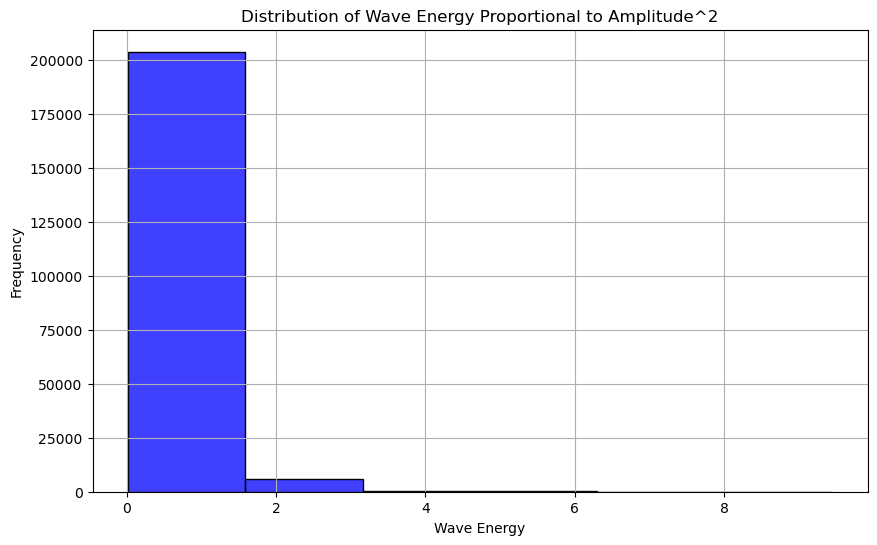

In [17]:
#plot historgram of wave energy distribution 

wave_energy =df['ETOT']
#Scotts rule for calculating bins
bin_num= int(np.ceil((wave_energy.max() - wave_energy.min()) / (3.5 * wave_energy.std())))

plt.figure(figsize=(10,6))
sns.histplot(wave_energy,color='blue',edgecolor='black',bins=bin_num)
plt.title('Distribution of Wave Energy Proportional to Amplitude^2')
plt.ylabel('Frequency')
plt.xlabel('Wave Energy')
plt.grid(True)
plt.show()

In [20]:
df.head(100).to_csv('Hindcast_100.csv', index = False)